# Import libraries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import dash;
import dash_core_components as dcc;
import dash_html_components as html;
import plotly.graph_objs as go
from datetime import datetime as dt
from datetime import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

C:\Users\Empapy\AppData\Local\Temp\ipykernel_6668\2344248300.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc;
C:\Users\Empapy\AppData\Local\Temp\ipykernel_6668\2344248300.py:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html;


# Read/Load Data

In [3]:
df=pd.read_csv('Desktop/supermarket.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

# EDA

In [8]:
City=df['City'].value_counts()

In [9]:
Yangon_City_Total=df.groupby('City').get_group('Yangon')['Total'].sum()
Mandalay_City_Total=df.groupby('City').get_group('Mandalay')['Total'].sum()
Naypyitaw_City_Total=df.groupby('City').get_group('Naypyitaw')['Total'].sum()

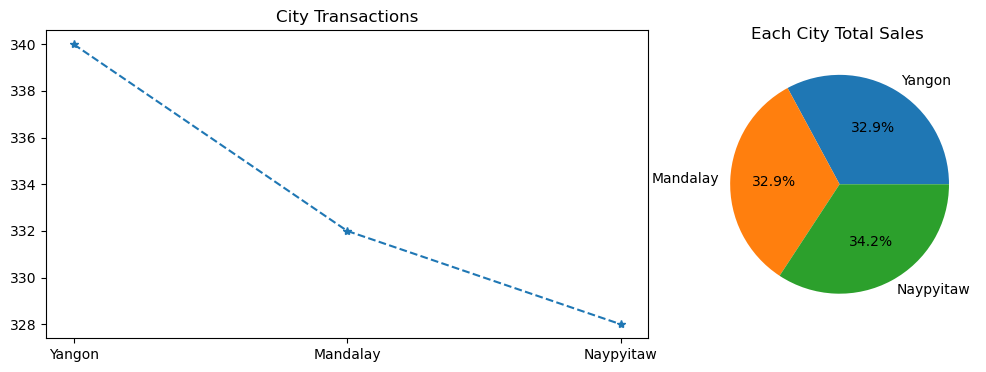

In [10]:
fig=plt.figure(figsize=(12,4))
gs=fig.add_gridspec(1,3)
ax1=fig.add_subplot(gs[0,-1])
plt.pie([Yangon_City_Total,Mandalay_City_Total,Naypyitaw_City_Total],labels=['Yangon','Mandalay','Naypyitaw'],autopct='%1.1f%%');
plt.title('Each City Total Sales ')
ax2=fig.add_subplot(gs[0,0:2])
plt.plot(City.index,City.values,'*--')
plt.title('City Transactions')

plt.savefig('Desktop/pie_Supermarket.png')

In [11]:
Yangon_City=df.groupby('City').get_group('Yangon')
Mandalay_City=df.groupby('City').get_group('Mandalay')
Naypyitaw_City=df.groupby('City').get_group('Naypyitaw')

In [12]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


# Yangon City

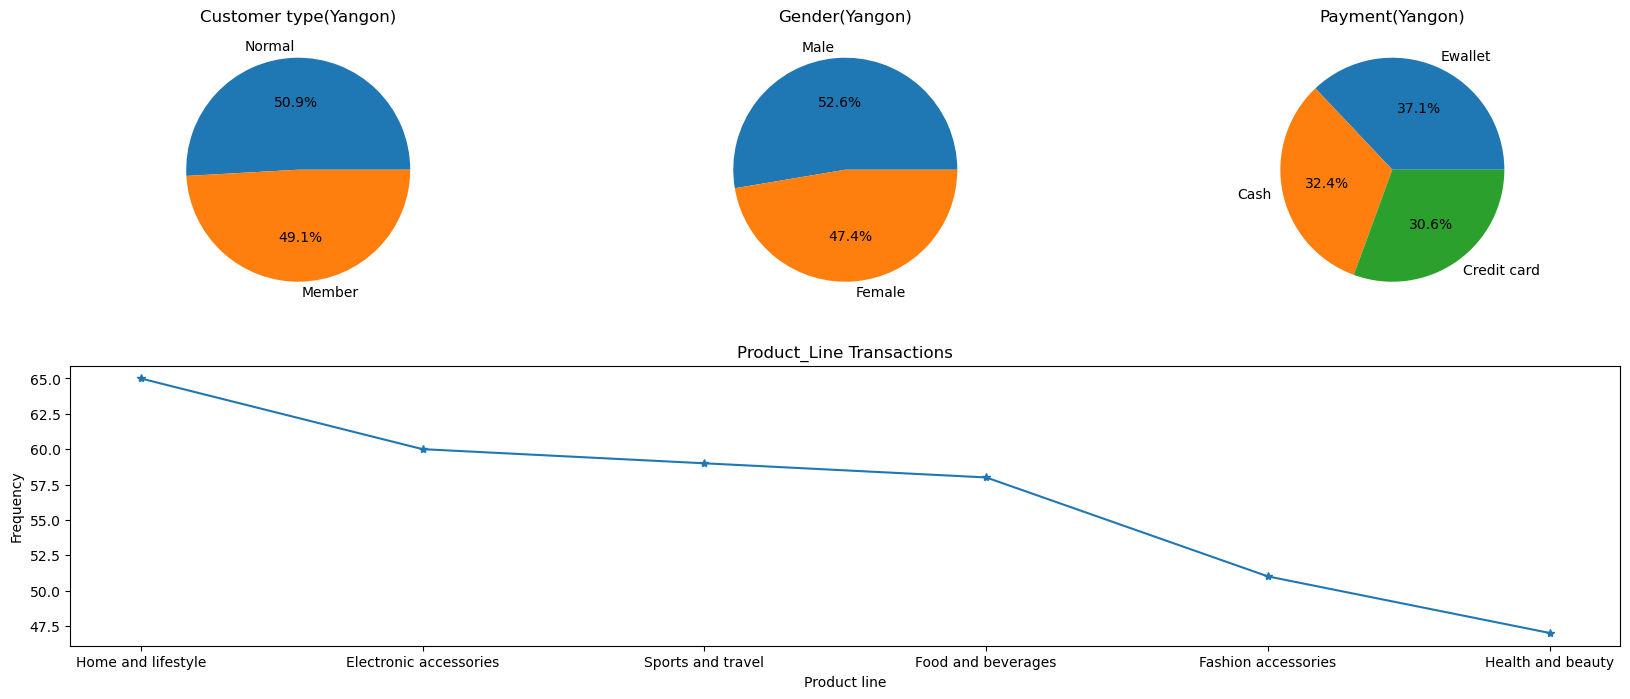

In [13]:
YangC_Values=Yangon_City['Customer type'].value_counts().values
YangC_index=Yangon_City['Customer type'].value_counts().index
YangG_Values=Yangon_City['Gender'].value_counts().values
YangG_index=Yangon_City['Gender'].value_counts().index
YangP_Values=Yangon_City['Payment'].value_counts().values
YangP_index=Yangon_City['Payment'].value_counts().index
YangProduct_Values=Yangon_City['Product line'].value_counts().values
YangProduct_index=Yangon_City['Product line'].value_counts().index

fig=plt.figure(figsize=(20,8))
gs = fig.add_gridspec(2,3)
ax1=fig.add_subplot(gs[0,0])
plt.pie(YangC_Values,labels=YangC_index,autopct='%1.1f%%')
plt.title('Customer type(Yangon)')

ax2=fig.add_subplot(gs[0,1])
plt.pie(YangG_Values,labels=YangG_index,autopct='%1.1f%%')
plt.title('Gender(Yangon)')

ax3=fig.add_subplot(gs[0,2])
plt.pie(YangP_Values,labels=YangP_index,autopct='%1.1f%%')
plt.title('Payment(Yangon)')

ax4=fig.add_subplot(gs[1,:])
plt.plot(YangProduct_index,YangProduct_Values,'*-')
plt.title('Product_Line Transactions')
plt.ylabel('Frequency')
plt.xlabel('Product line')
plt.show()
fig.savefig("Desktop/Yangon.png")

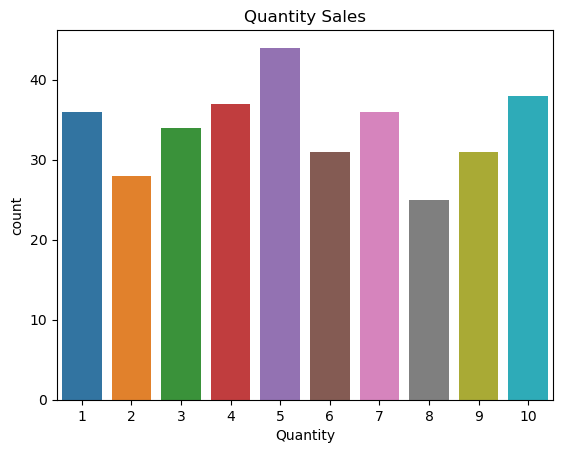

In [14]:
plt.figure()
sns.countplot(x=Yangon_City['Quantity'])
plt.title('Quantity Sales')
plt.savefig('Desktop/Quantity.png')

In [15]:
Yangon_City['Product line'].value_counts()

Product line
Home and lifestyle        65
Electronic accessories    60
Sports and travel         59
Food and beverages        58
Fashion accessories       51
Health and beauty         47
Name: count, dtype: int64

In [16]:
Products_Profit=Yangon_City.groupby('Product line')['Total'].sum()
Products_Quantity=Yangon_City.groupby('Quantity')['Total'].sum()

app =dash.Dash()
app.layout=html.Div([
    html.H1(children='EDA OF PRODUCT LINE (Yangon )',style={'textAlign':'center','color':'red' }),
dcc.Graph(
        figure={
            'data':[
             
                {'x':Products_Profit.index,'y':Products_Profit.values,'type':'bar','name':'Total'},
                {'x':Products_Profit.index,'y':Products_Quantity.values,'type':'bar','name':'Quantity'}
                
                
            ],
            'layout': go.Layout(
                title='Prodcut line',
                xaxis={'title':'Product Line'},
                yaxis={'title':'(Quantity,Total)'},
                
                
            
            )
        },
       
    )]),
if __name__ == '__main__':
    app.run_server()

# Feature Engineering

In [17]:
Yangon_City['Date']=pd.to_datetime(Yangon_City['Date']);
Yangon_City['Year']=Yangon_City['Date'].dt.year
Yangon_City['Day']=Yangon_City['Date'].dt.day
Yangon_City['Month']=Yangon_City['Date'].dt.month;

C:\Users\Empapy\AppData\Local\Temp\ipykernel_6668\868914517.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Empapy\AppData\Local\Temp\ipykernel_6668\868914517.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Empapy\AppData\Local\Temp\ipykernel_6668\868914517.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [18]:
Yangon_City.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Day,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,5,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,27,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,8,2
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8,2019,25,2


In [19]:
Yangon_City.drop(['Time','Rating','Year'],axis=1,inplace=True)

C:\Users\Empapy\AppData\Local\Temp\ipykernel_6668\3677817226.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

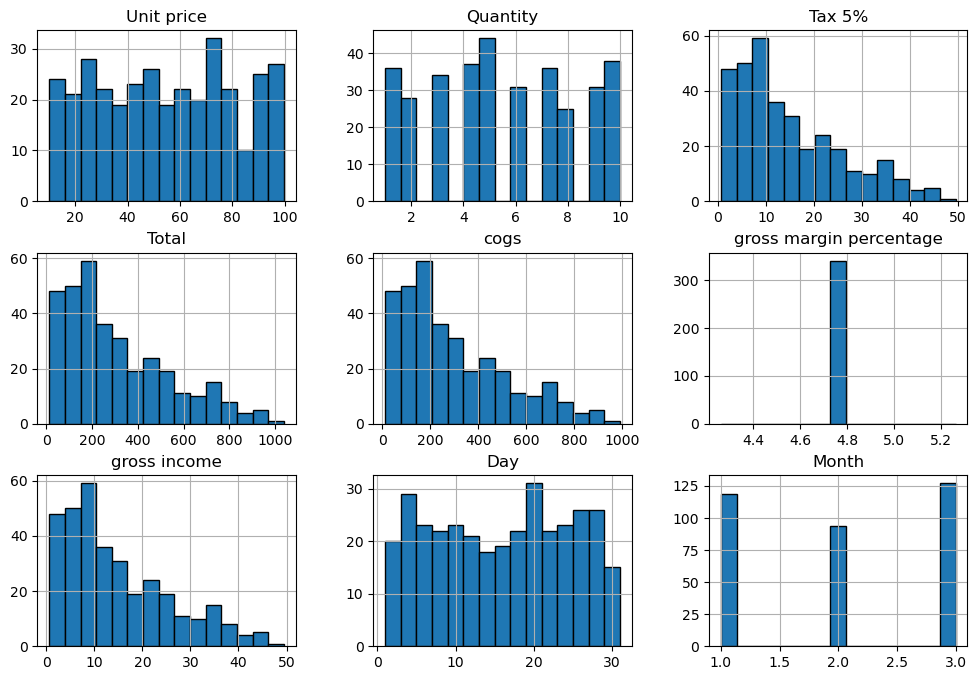

In [20]:
Yangon_City.drop(['Date'],axis=1).hist(bins=15,edgecolor='black',figsize=(12,8))

In [21]:
Yangon_City.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Day',
       'Month'],
      dtype='object')

Unit price                    Axes(0.125,0.653529;0.227941x0.226471)
Quantity                   Axes(0.398529,0.653529;0.227941x0.226471)
Tax 5%                     Axes(0.672059,0.653529;0.227941x0.226471)
Total                         Axes(0.125,0.381765;0.227941x0.226471)
cogs                       Axes(0.398529,0.381765;0.227941x0.226471)
gross margin percentage    Axes(0.672059,0.381765;0.227941x0.226471)
gross income                      Axes(0.125,0.11;0.227941x0.226471)
dtype: object

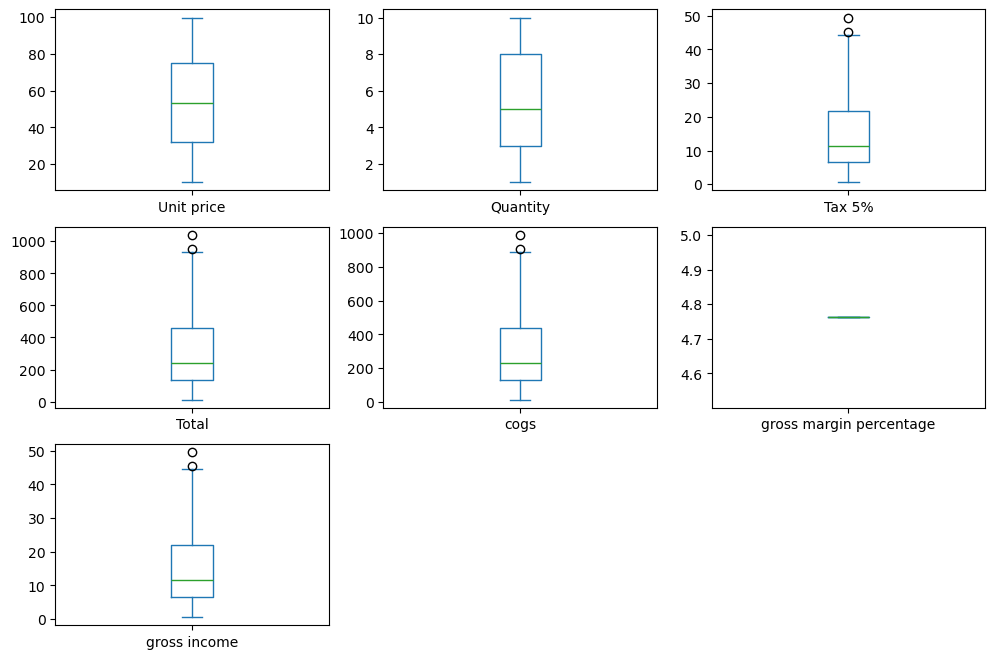

In [22]:
Yangon_City.drop(['Day','Month'],axis=1).plot(kind='box',
                subplots=True,
                layout=(3,3),
                figsize=(12,8))

Text(0.5, 1.0, 'Months')

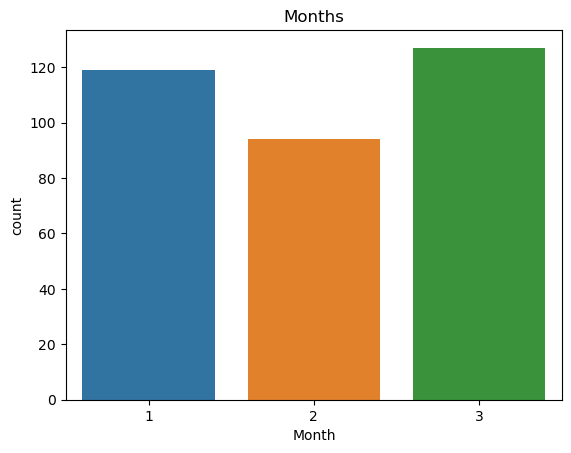

In [23]:
sns.countplot(x=Yangon_City['Month'])
plt.title('Months')

In [24]:
Yangon_City.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Day,Month
count,340.000000,340.000000,340.000000,340.000000,340,340.000000,3.400000e+02,340.000000,340.000000,340.000000
mean,54.780853,5.467647,14.874001,312.354031,2019-02-14 23:55:45.882352896,297.480029,4.761905e+00,14.874001,15.388235,2.023529
min,10.080000,1.000000,0.604500,12.694500,2019-01-01 00:00:00,12.090000,4.761905e+00,0.604500,1.000000,1.000000
25%,32.250000,3.000000,6.547125,137.489625,2019-01-23 00:00:00,130.942500,4.761905e+00,6.547125,8.000000,1.000000
50%,53.235000,5.000000,11.468000,240.828000,2019-02-15 00:00:00,229.360000,4.761905e+00,11.468000,16.000000,2.000000
75%,75.095000,8.000000,21.873375,459.340875,2019-03-10 00:00:00,437.467500,4.761905e+00,21.873375,23.000000,3.000000
max,99.830000,10.000000,49.490000,1039.290000,2019-03-30 00:00:00,989.800000,4.761905e+00,49.490000,31.000000,3.000000
std,26.132127,2.859876,11.030477,231.640025,NaN,220.609547,1.778975e-14,11.030477,8.620609,0.851533


In [25]:
num_cols=Yangon_City.describe().columns

# Feature Selection

C:\Users\Empapy\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



<Axes: >

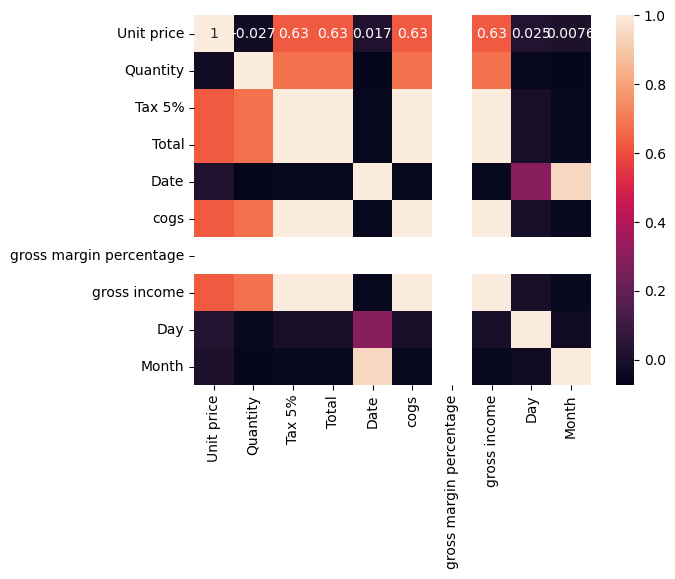

In [26]:
Corr_Matrix=Yangon_City[num_cols].corr()
sns.heatmap(Corr_Matrix,annot=True)

In [27]:
# For drop the features which in berween High corr and also with  y label
def drop_featuers(df,threshold=0.7):
    corr_mat=df.corr()
    feature_drop=[]
    for i in range(corr_mat.shape[0]-1):
        for j in range(i+1 , corr_mat.shape[0]-1):
            if abs(corr_mat.iloc[i,j])>threshold:
                if corr_mat.iloc[i,corr_mat.shape[0]-1]> corr_mat.iloc[j,corr_mat.shape[0]-1]:
                    feature_drop.append(corr_mat.index[j])
                else:
                    feature_drop.append(corr_mat.index[i])
    return df.drop(columns=feature_drop) , feature_drop

In [28]:
drop_featuers(Yangon_City[num_cols])

(     Unit price  Quantity     Total       Date  gross margin percentage  Day  \
 0         74.69         7  548.9715 2019-01-05                 4.761905    5   
 2         46.33         7  340.5255 2019-03-03                 4.761905    3   
 3         58.22         8  489.0480 2019-01-27                 4.761905   27   
 4         86.31         7  634.3785 2019-02-08                 4.761905    8   
 6         68.84         6  433.6920 2019-02-25                 4.761905   25   
 ..          ...       ...       ...        ...                      ...  ...   
 990       56.56         5  296.9400 2019-03-22                 4.761905   22   
 992       58.03         2  121.8630 2019-03-10                 4.761905   10   
 997       31.84         1   33.4320 2019-02-09                 4.761905    9   
 998       65.82         1   69.1110 2019-02-22                 4.761905   22   
 999       88.34         7  649.2990 2019-02-18                 4.761905   18   
 
      Month  
 0        1 

C:\Users\Empapy\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



<Axes: >

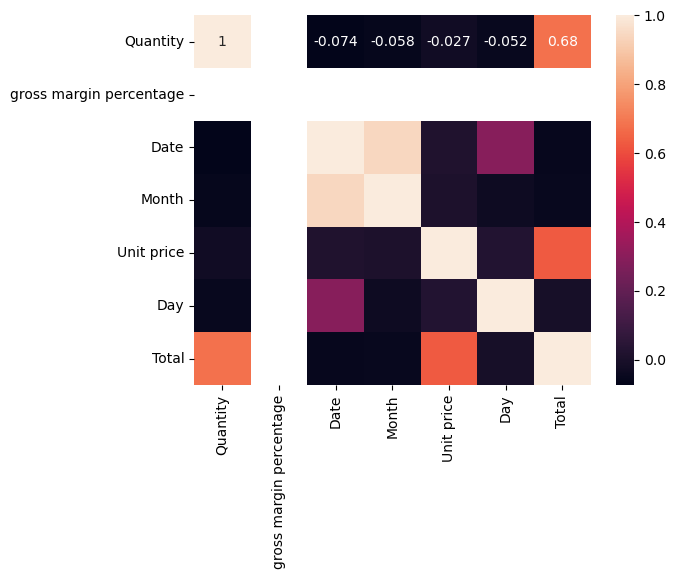

In [29]:
num_col=set(num_cols)-set(drop_featuers(Yangon_City[num_cols])[1])
numeric_Cols=list(num_col)
sns.heatmap(Yangon_City[numeric_Cols].corr(),annot=True)

In [30]:
Yangon_City[numeric_Cols].corr()

,Quantity,gross margin percentage,Date,Month,Unit price,Day,Total
Quantity,1.000000,NaN,-0.073761,-0.057829,-0.027409,-0.052375,0.680007
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,-0.073761,NaN,1.000000,0.945372,0.017401,0.293250,-0.053026
Month,-0.057829,NaN,0.945372,1.000000,0.007590,-0.033396,-0.052654
Unit price,-0.027409,NaN,0.017401,0.007590,1.000000,0.025351,0.630045
Day,-0.052375,NaN,0.293250,-0.033396,0.025351,1.000000,-0.009171
Total,0.680007,NaN,-0.053026,-0.052654,0.630045,-0.009171,1.000000


# Create a Model Yangon

Text(0.5, 1.0, 'By using test size = 4')

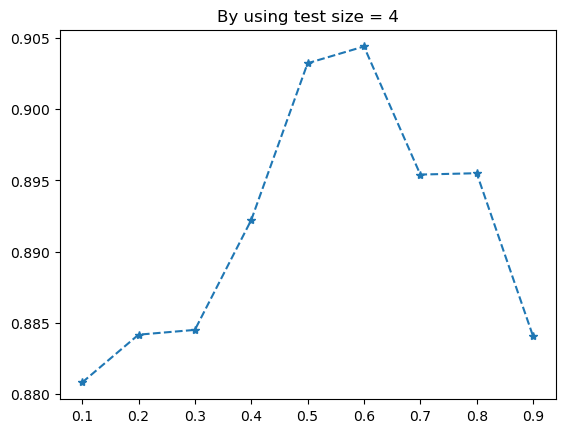

In [31]:
X=np.array(Yangon_City[['Quantity','Unit price']])
y=np.array(Yangon_City['Total'])
testing=np.linspace(0.1,0.9,9)

score=[]
for s in testing:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=s,random_state=0)
    Scaler=MinMaxScaler()
    Scaler.fit(X_train,y_train)
    Scaler.transform(X_train)
    Scaler.transform(X_test)
    Model=LinearRegression()
    Model.fit(X_train,y_train)
    r2=Model.score(X_train,y_train)
    score.append(r2)
plt.plot(testing,score,'*--')
plt.title('By using test size = 4')

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
Scaler=MinMaxScaler()
Scaler.fit(X_train,y_train)
Scaler.transform(X_train)
Scaler.transform(X_test)
Model=LinearRegression()
Model.fit(X_train,y_train)
Model.score(X_train,y_train)

0.884708495656485

In [33]:
Model.score(X_test,y_test)

0.873695728461191

# Mandalay City

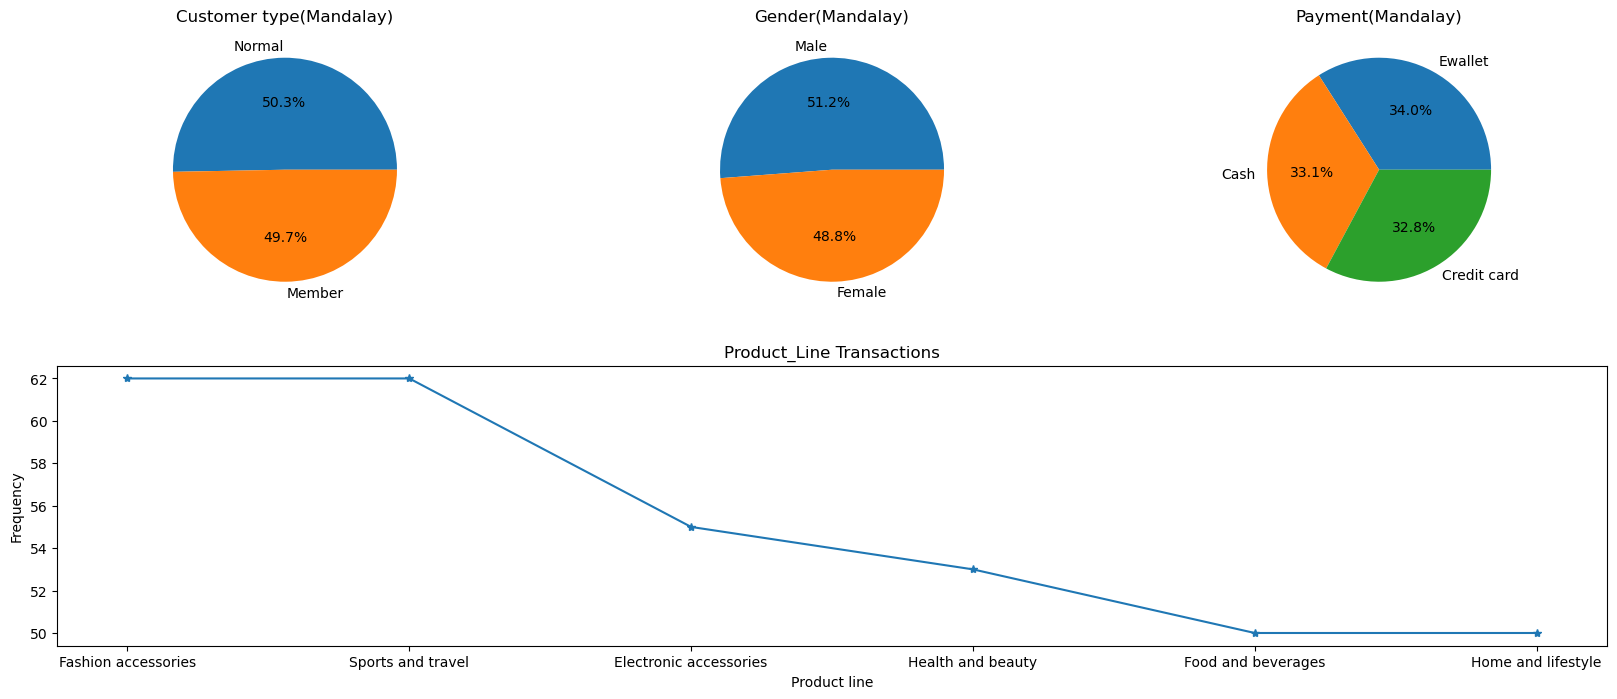

In [34]:
MandaC_Values=Mandalay_City['Customer type'].value_counts().values
MandaC_index=Mandalay_City['Customer type'].value_counts().index
MandaG_Values=Mandalay_City['Gender'].value_counts().values
MandaG_index=Mandalay_City['Gender'].value_counts().index
MandaP_Values=Mandalay_City['Payment'].value_counts().values
MandaP_index=Mandalay_City['Payment'].value_counts().index
MandaProduct_Values=Mandalay_City['Product line'].value_counts().values
MandaProduct_index=Mandalay_City['Product line'].value_counts().index

fig=plt.figure(figsize=(20,8))
gs = fig.add_gridspec(2,3)
ax1=fig.add_subplot(gs[0,0])
plt.pie(MandaC_Values,labels=MandaC_index,autopct='%1.1f%%')
plt.title('Customer type(Mandalay)')

ax2=fig.add_subplot(gs[0,1])
plt.pie(MandaG_Values,labels=MandaG_index,autopct='%1.1f%%')
plt.title('Gender(Mandalay)')

ax3=fig.add_subplot(gs[0,2])
plt.pie(MandaP_Values,labels=MandaP_index,autopct='%1.1f%%')
plt.title('Payment(Mandalay)')

ax4=fig.add_subplot(gs[1,:])
plt.plot(MandaProduct_index,MandaProduct_Values,'*-')
plt.title('Product_Line Transactions')
plt.ylabel('Frequency')
plt.xlabel('Product line')
plt.show()
fig.savefig("Desktop/Mandaalay.png")

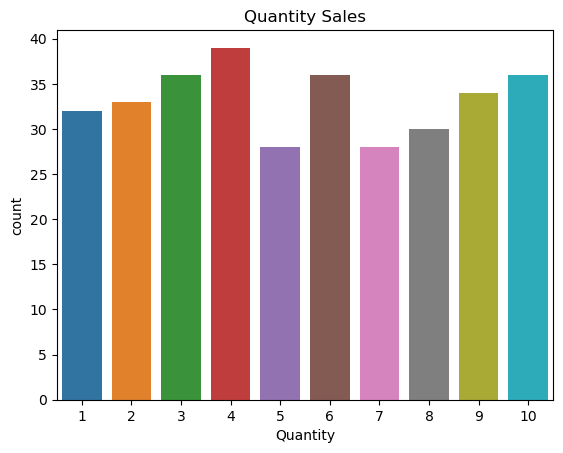

In [35]:
plt.figure()
sns.countplot(x=Mandalay_City['Quantity'])
plt.title('Quantity Sales')
plt.savefig('Desktop/Quantity.png')

In [36]:
Mandalay_City['Product line'].value_counts()

Product line
Fashion accessories       62
Sports and travel         62
Electronic accessories    55
Health and beauty         53
Food and beverages        50
Home and lifestyle        50
Name: count, dtype: int64

In [37]:
Products_Profit=Mandalay_City.groupby('Product line')['Total'].sum()
Products_Quantity=Mandalay_City.groupby('Quantity')['Total'].sum()

app =dash.Dash()
app.layout=html.Div([
    html.H1(children='EDA OF PRODUCT LINE (Mandalay)',style={'textAlign':'center','color':'red' }),
dcc.Graph(
        figure={
            'data':[
             
                {'x':Products_Profit.index,'y':Products_Profit.values,'type':'bar','name':'Total'},
                {'x':Products_Profit.index,'y':Products_Quantity.values,'type':'bar','name':'Quantity'}
                
                
            ],
            'layout': go.Layout(
                title='Prodcut line',
                xaxis={'title':'Product Line'},
                yaxis={'title':'(Quantity,Total)'},
                
                
            
            )
        },
       
    )]),
if __name__ == '__main__':
    app.run_server()

In [38]:
Mandalay_City['Date']=pd.to_datetime(Mandalay_City['Date']);
Mandalay_City['Year']=Mandalay_City['Date'].dt.year
Mandalay_City['Day']=Mandalay_City['Date'].dt.day
Mandalay_City['Month']=Mandalay_City['Date'].dt.month;

C:\Users\Empapy\AppData\Local\Temp\ipykernel_6668\3049546635.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Empapy\AppData\Local\Temp\ipykernel_6668\3049546635.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Empapy\AppData\Local\Temp\ipykernel_6668\3049546635.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

C:\Users\Empapy\AppData\Local\Temp\ipykernel_6668\2014143620.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

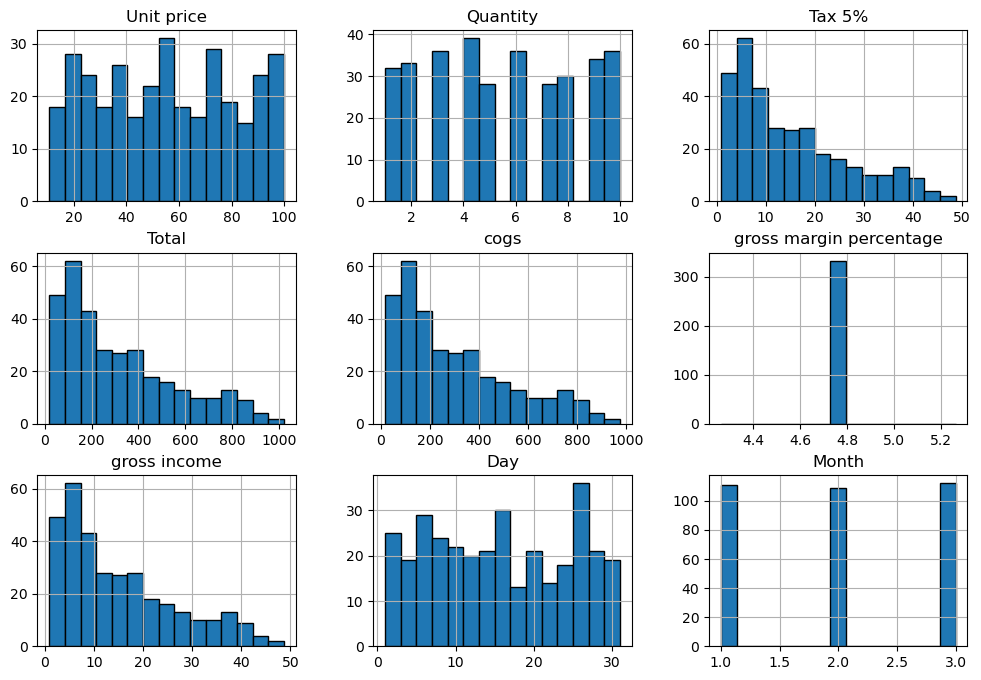

In [39]:
Mandalay_City.drop(['Time','Rating','Year'],axis=1,inplace=True)
Mandalay_City.drop(['Date'],axis=1).hist(bins=15,edgecolor='black',figsize=(12,8))

Unit price                    Axes(0.125,0.653529;0.227941x0.226471)
Quantity                   Axes(0.398529,0.653529;0.227941x0.226471)
Tax 5%                     Axes(0.672059,0.653529;0.227941x0.226471)
Total                         Axes(0.125,0.381765;0.227941x0.226471)
cogs                       Axes(0.398529,0.381765;0.227941x0.226471)
gross margin percentage    Axes(0.672059,0.381765;0.227941x0.226471)
gross income                      Axes(0.125,0.11;0.227941x0.226471)
dtype: object

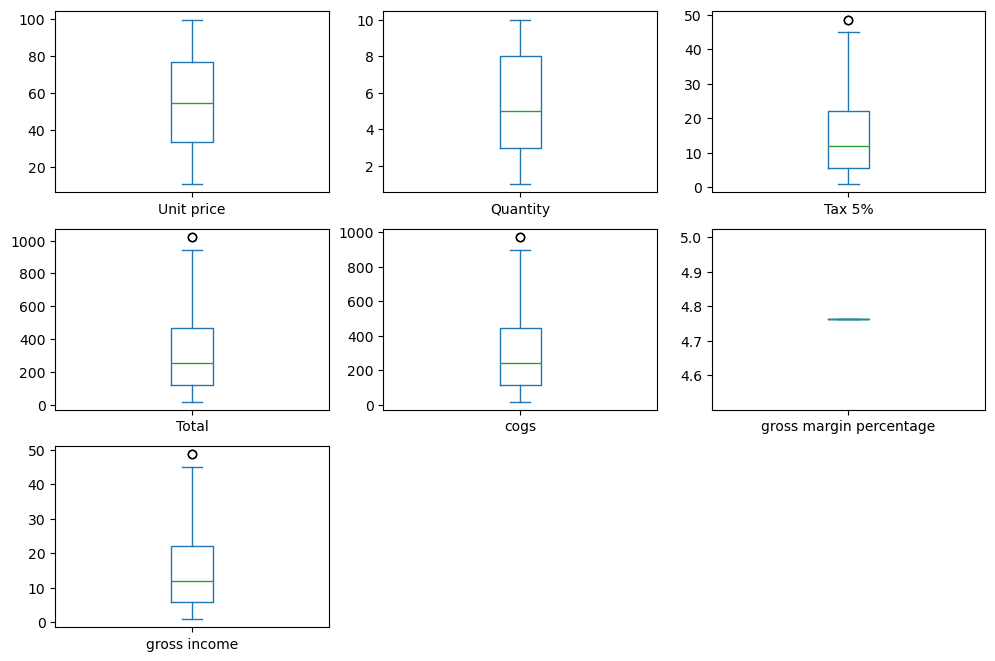

In [40]:
Mandalay_City.drop(['Day','Month'],axis=1).plot(kind='box',
                subplots=True,
                layout=(3,3),
                figsize=(12,8))

Text(0.5, 1.0, 'Months')

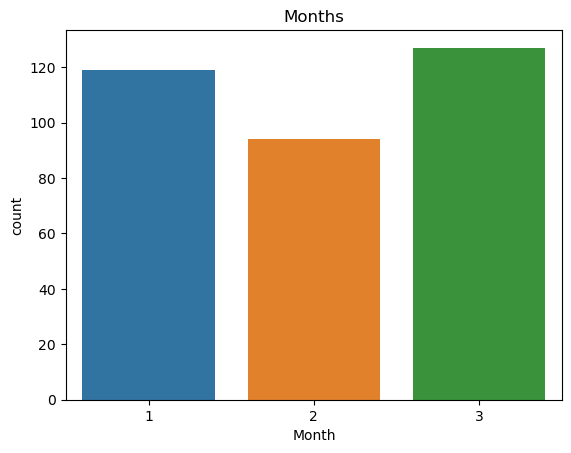

In [41]:
sns.countplot(x=Yangon_City['Month'])
plt.title('Months')

# Feature Selection


In [42]:
Mandalay_City.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Day,Month
count,332.000000,332.000000,332.000000,332.000000,332,332.000000,3.320000e+02,332.000000,332.000000,332.000000
mean,55.659277,5.481928,15.232024,319.872506,2019-02-14 08:18:47.710843392,304.640482,4.761905e+00,15.232024,15.265060,2.003012
min,10.590000,1.000000,0.887500,18.637500,2019-01-01 00:00:00,17.750000,4.761905e+00,0.887500,1.000000,1.000000
25%,33.300000,3.000000,5.711250,119.936250,2019-01-26 00:00:00,114.225000,4.761905e+00,5.711250,7.000000,1.000000
50%,54.850000,5.000000,12.042000,252.882000,2019-02-15 00:00:00,240.840000,4.761905e+00,12.042000,15.000000,2.000000
75%,77.002500,8.000000,22.170750,465.585750,2019-03-06 00:00:00,443.415000,4.761905e+00,22.170750,24.000000,3.000000
max,99.960000,10.000000,48.690000,1022.490000,2019-03-30 00:00:00,973.800000,4.761905e+00,48.690000,31.000000,3.000000
std,26.224559,2.896446,11.545122,242.447565,NaN,230.902443,1.601134e-14,11.545122,8.864314,0.820797


In [43]:
num_cols=Mandalay_City.describe().columns

In [44]:
num_cols

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'cogs',
       'gross margin percentage', 'gross income', 'Day', 'Month'],
      dtype='object')

C:\Users\Empapy\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



<Axes: >

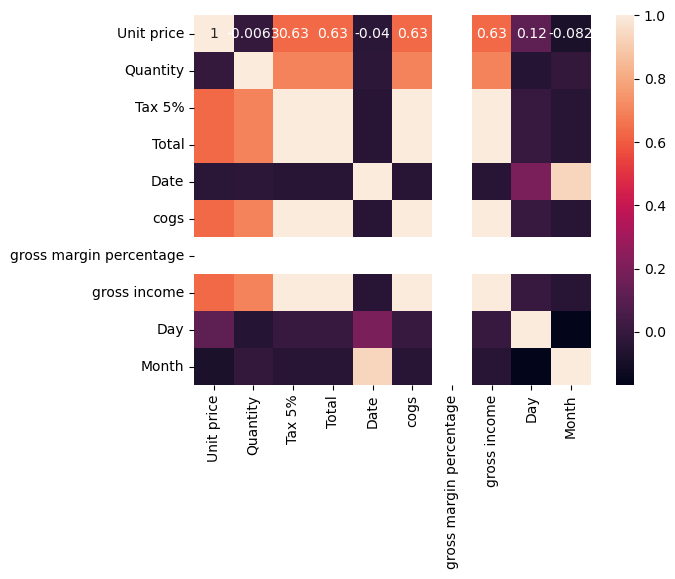

In [45]:
Corr_Matrix=Mandalay_City[num_cols].corr()
sns.heatmap(Corr_Matrix,annot=True)

In [46]:
drop_featuers(Mandalay_City[num_cols])

(     Unit price  Quantity     Total       Date  gross margin percentage  Day  \
 9         54.84         3   172.746 2019-02-20                 4.761905   20   
 10        14.48         4    60.816 2019-02-06                 4.761905    6   
 11        25.51         4   107.142 2019-03-09                 4.761905    9   
 15        93.72         6   590.436 2019-01-15                 4.761905   15   
 19        40.30         2    84.630 2019-03-11                 4.761905   11   
 ..          ...       ...       ...        ...                      ...  ...   
 987       62.00         8   520.800 2019-01-03                 4.761905    3   
 989       75.37         8   633.108 2019-01-28                 4.761905   28   
 991       76.60        10   804.300 2019-01-24                 4.761905   24   
 993       17.49        10   183.645 2019-02-22                 4.761905   22   
 996       97.38        10  1022.490 2019-03-02                 4.761905    2   
 
      Month  
 9        2 

C:\Users\Empapy\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



<Axes: >

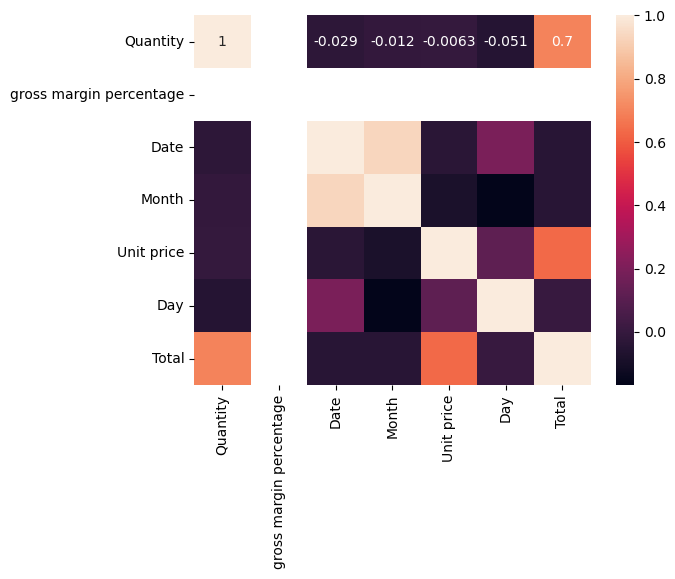

In [47]:
num_col=set(num_cols)-set(drop_featuers(Mandalay_City[num_cols])[1])
numeric_Cols=list(num_col)
sns.heatmap(Mandalay_City[numeric_Cols].corr(),annot=True)

In [48]:
Mandalay_City[numeric_Cols].corr()

,Quantity,gross margin percentage,Date,Month,Unit price,Day,Total
Quantity,1.000000,NaN,-0.028936,-0.012049,-0.006334,-0.051234,0.698102
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,-0.028936,NaN,1.000000,0.933165,-0.040157,0.196138,-0.042300
Month,-0.012049,NaN,0.933165,1.000000,-0.082139,-0.168279,-0.044005
Unit price,-0.006334,NaN,-0.040157,-0.082139,1.000000,0.116939,0.633766
Day,-0.051234,NaN,0.196138,-0.168279,0.116939,1.000000,0.004952
Total,0.698102,NaN,-0.042300,-0.044005,0.633766,0.004952,1.000000


# Create a Model Mandalay

Text(0.5, 1.0, 'By using test size = 0')

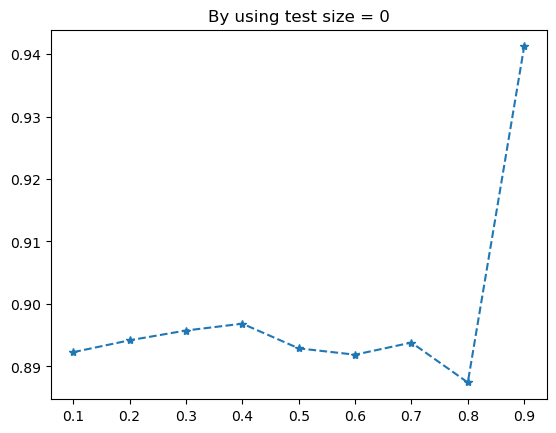

In [49]:
X=np.array(Mandalay_City[['Quantity','Unit price']])
y=np.array(Mandalay_City['Total'])
testing=np.linspace(0.1,0.9,9)

score=[]
for s in testing:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=s,random_state=0)
    Scaler=MinMaxScaler()
    Scaler.fit(X_train,y_train)
    Scaler.transform(X_train)
    Scaler.transform(X_test)
    Model=LinearRegression()
    Model.fit(X_train,y_train)
    r2=Model.score(X_train,y_train)
    score.append(r2)
plt.plot(testing,score,'*--')
plt.title('By using test size = 0')

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
Scaler=MinMaxScaler()
Scaler.fit(X_train,y_train)
Scaler.transform(X_train)
Scaler.transform(X_test)
Model=LinearRegression()
Model.fit(X_train,y_train)
Model.score(X_train,y_train)

0.8957426649493588

In [51]:
Model.score(X_test,y_test)

0.8764477335858655

# Naypyitaw_City

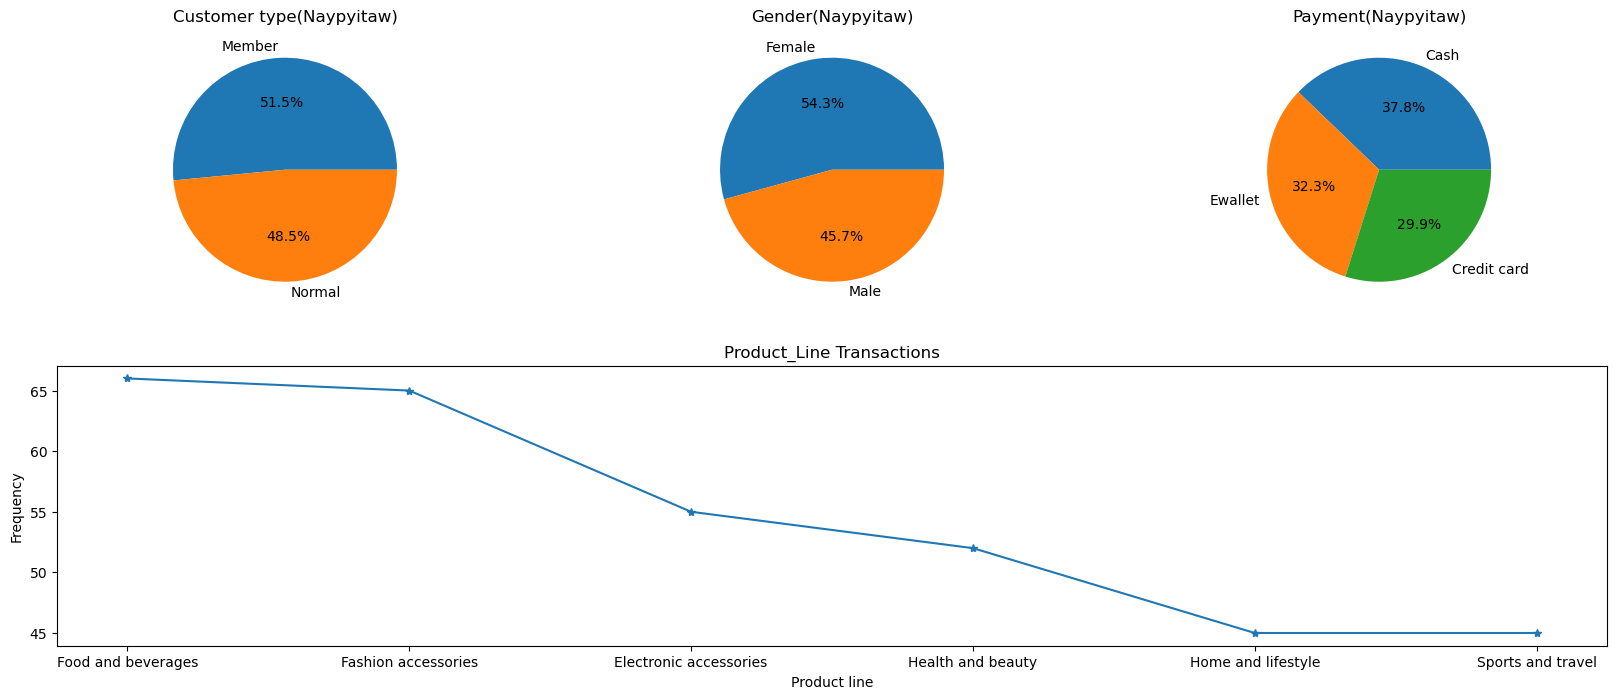

In [52]:
NayC_Values=Naypyitaw_City['Customer type'].value_counts().values
NayC_index=Naypyitaw_City['Customer type'].value_counts().index
NayG_Values=Naypyitaw_City['Gender'].value_counts().values
NayG_index=Naypyitaw_City['Gender'].value_counts().index
NayP_Values=Naypyitaw_City['Payment'].value_counts().values
NayP_index=Naypyitaw_City['Payment'].value_counts().index
NayProduct_Values=Naypyitaw_City['Product line'].value_counts().values
NayProduct_index=Naypyitaw_City['Product line'].value_counts().index

fig=plt.figure(figsize=(20,8))
gs = fig.add_gridspec(2,3)
ax1=fig.add_subplot(gs[0,0])
plt.pie(NayC_Values,labels=NayC_index,autopct='%1.1f%%')
plt.title('Customer type(Naypyitaw)')

ax2=fig.add_subplot(gs[0,1])
plt.pie(NayG_Values,labels=NayG_index,autopct='%1.1f%%')
plt.title('Gender(Naypyitaw)')

ax3=fig.add_subplot(gs[0,2])
plt.pie(NayP_Values,labels=NayP_index,autopct='%1.1f%%')
plt.title('Payment(Naypyitaw)')

ax4=fig.add_subplot(gs[1,:])
plt.plot(NayProduct_index,NayProduct_Values,'*-')
plt.title('Product_Line Transactions')
plt.ylabel('Frequency')
plt.xlabel('Product line')
plt.show()
fig.savefig("Desktop/Naypyitaw.png")

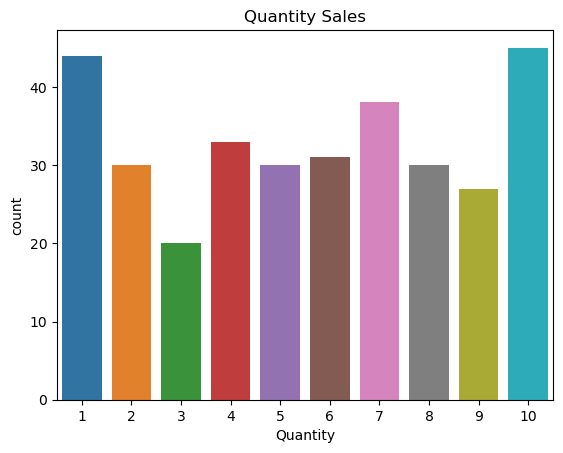

In [53]:
plt.figure()
sns.countplot(x=Naypyitaw_City['Quantity'])
plt.title('Quantity Sales')
plt.savefig('Desktop/Quantity.png')

In [54]:
Naypyitaw_City['Product line'].value_counts()

Product line
Food and beverages        66
Fashion accessories       65
Electronic accessories    55
Health and beauty         52
Home and lifestyle        45
Sports and travel         45
Name: count, dtype: int64

In [55]:
Products_Profit=Naypyitaw_City.groupby('Product line')['Total'].sum()
Products_Quantity=Naypyitaw_City.groupby('Quantity')['Total'].sum()

app =dash.Dash()
app.layout=html.Div([
    html.H1(children='EDA OF PRODUCT LINE (Naypyitaw)',style={'textAlign':'center','color':'red' }),
dcc.Graph(
        figure={
            'data':[
             
                {'x':Products_Profit.index,'y':Products_Profit.values,'type':'bar','name':'Total'},
                {'x':Products_Profit.index,'y':Products_Quantity.values,'type':'bar','name':'Quantity'}
                
                
            ],
            'layout': go.Layout(
                title='Prodcut line',
                xaxis={'title':'Product Line'},
                yaxis={'title':'(Quantity,Total)'},
                
                
            
            )
        },
       
    )]),
if __name__ == '__main__':
    app.run_server()

In [56]:
Naypyitaw_City['Date']=pd.to_datetime(Naypyitaw_City['Date']);
Naypyitaw_City['Year']=Naypyitaw_City['Date'].dt.year
Naypyitaw_City['Day']=Naypyitaw_City['Date'].dt.day
Naypyitaw_City['Month']=Naypyitaw_City['Date'].dt.month;

C:\Users\Empapy\AppData\Local\Temp\ipykernel_6668\764545419.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Empapy\AppData\Local\Temp\ipykernel_6668\764545419.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Empapy\AppData\Local\Temp\ipykernel_6668\764545419.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

C:\Users\Empapy\AppData\Local\Temp\ipykernel_6668\123565233.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

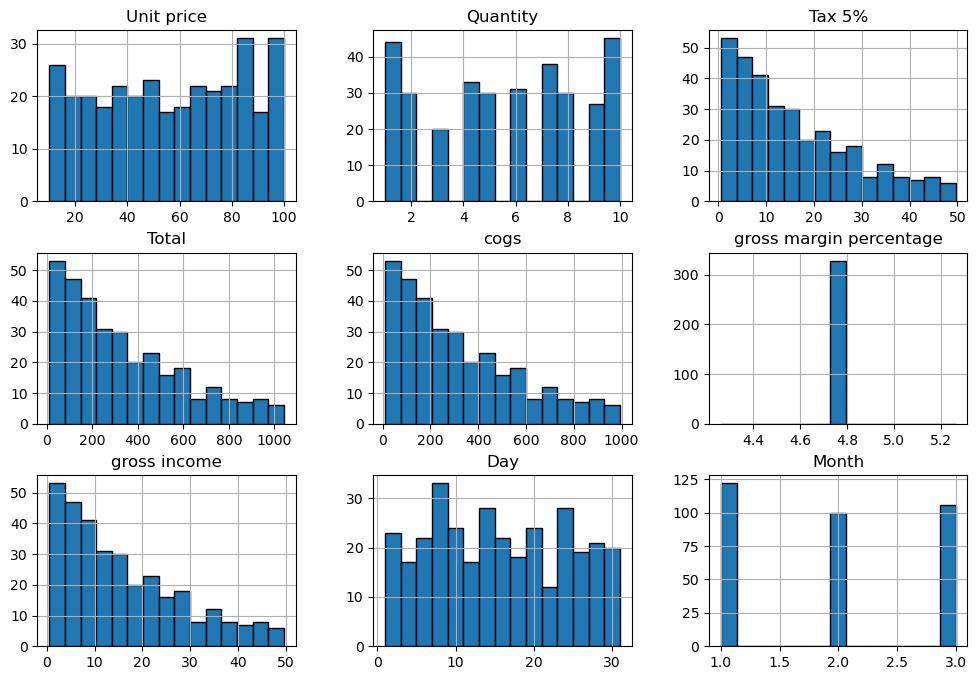

In [57]:
Naypyitaw_City.drop(['Time','Rating','Year'],axis=1,inplace=True)
Naypyitaw_City.drop(['Date'],axis=1).hist(bins=15,edgecolor='black',figsize=(12,8))

Unit price                    Axes(0.125,0.653529;0.227941x0.226471)
Quantity                   Axes(0.398529,0.653529;0.227941x0.226471)
Tax 5%                     Axes(0.672059,0.653529;0.227941x0.226471)
Total                         Axes(0.125,0.381765;0.227941x0.226471)
cogs                       Axes(0.398529,0.381765;0.227941x0.226471)
gross margin percentage    Axes(0.672059,0.381765;0.227941x0.226471)
gross income                      Axes(0.125,0.11;0.227941x0.226471)
dtype: object

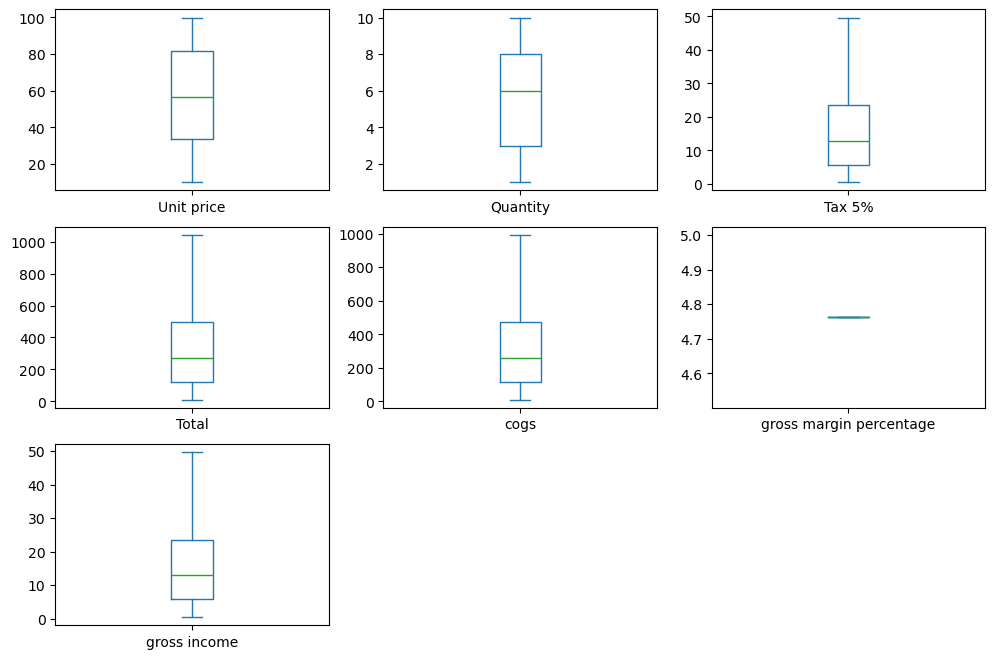

In [58]:
Naypyitaw_City.drop(['Day','Month'],axis=1).plot(kind='box',
                subplots=True,
                layout=(3,3),
                figsize=(12,8))

Text(0.5, 1.0, 'Months')

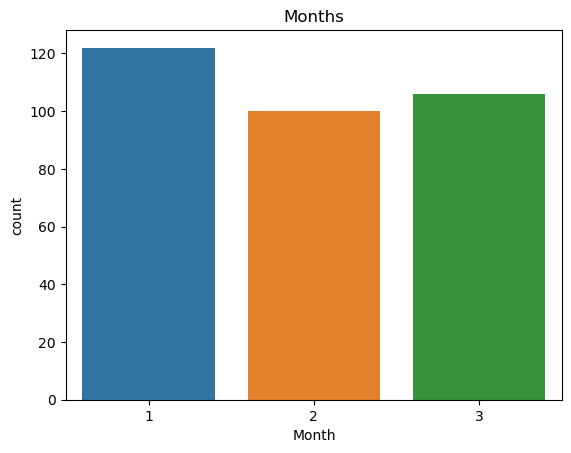

In [59]:
sns.countplot(x=Naypyitaw_City['Month'])
plt.title('Months')

# Feature Selection

In [60]:
Naypyitaw_City.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Day,Month
count,328.000000,328.000000,328.000000,328.000000,328,328.000000,3.280000e+02,328.000000,328.000000,328.000000
mean,56.609024,5.582317,16.052367,337.099715,2019-02-12 15:04:23.414634240,321.047348,4.761905e+00,16.052367,15.109756,1.951220
min,10.160000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.170000,4.761905e+00,0.508500,1.000000,1.000000
25%,33.767500,3.000000,5.784500,121.474500,2019-01-23 00:00:00,115.690000,4.761905e+00,5.784500,8.000000,1.000000
50%,56.810000,6.000000,12.924750,271.419750,2019-02-09 00:00:00,258.495000,4.761905e+00,12.924750,14.500000,2.000000
75%,81.552500,8.000000,23.607375,495.754875,2019-03-07 00:00:00,472.147500,4.761905e+00,23.607375,23.000000,3.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.000000,4.761905e+00,49.650000,31.000000,3.000000
std,27.179799,3.021724,12.531470,263.160870,NaN,250.629400,1.512210e-14,12.531470,8.618316,0.833583


In [61]:
num_cols=Mandalay_City.describe().columns

In [62]:
Corr_Matrix

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Day,Month
Unit price,1.000000,-0.006334,0.633766,0.633766,-0.040157,0.633766,NaN,0.633766,0.116939,-0.082139
Quantity,-0.006334,1.000000,0.698102,0.698102,-0.028936,0.698102,NaN,0.698102,-0.051234,-0.012049
Tax 5%,0.633766,0.698102,1.000000,1.000000,-0.042300,1.000000,NaN,1.000000,0.004952,-0.044005
Total,0.633766,0.698102,1.000000,1.000000,-0.042300,1.000000,NaN,1.000000,0.004952,-0.044005
Date,-0.040157,-0.028936,-0.042300,-0.042300,1.000000,-0.042300,NaN,-0.042300,0.196138,0.933165
cogs,0.633766,0.698102,1.000000,1.000000,-0.042300,1.000000,NaN,1.000000,0.004952,-0.044005
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633766,0.698102,1.000000,1.000000,-0.042300,1.000000,NaN,1.000000,0.004952,-0.044005
Day,0.116939,-0.051234,0.004952,0.004952,0.196138,0.004952,NaN,0.004952,1.000000,-0.168279
Month,-0.082139,-0.012049,-0.044005,-0.044005,0.933165,-0.044005,NaN,-0.044005,-0.168279,1.000000


C:\Users\Empapy\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



<Axes: >

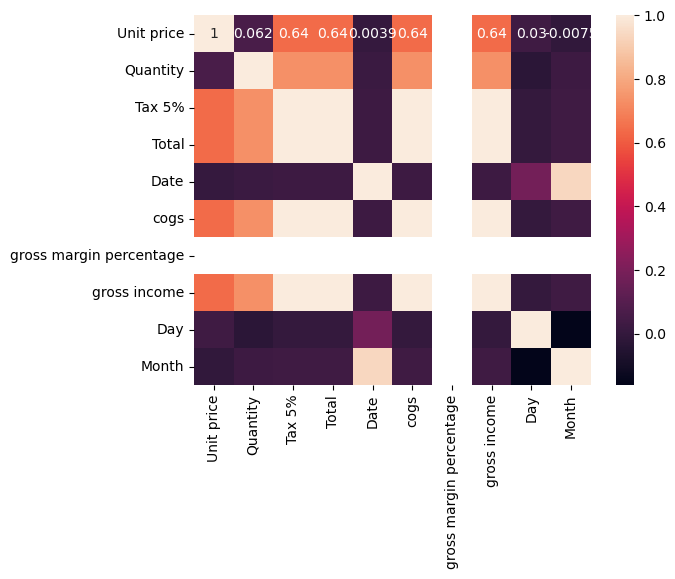

In [63]:
Corr_Matrix=Naypyitaw_City[num_cols].corr()
sns.heatmap(Corr_Matrix,annot=True)

In [64]:
drop_featuers(Naypyitaw_City[num_cols])

(     Unit price     Total       Date  gross margin percentage  Day  Month
 1         15.28   80.2200 2019-03-08                 4.761905    8      3
 5         85.39  627.6165 2019-03-25                 4.761905   25      3
 7         73.56  772.3800 2019-02-24                 4.761905   24      2
 20        86.04  451.7100 2019-02-25                 4.761905   25      2
 34        99.42  417.5640 2019-02-06                 4.761905    6      2
 ..          ...       ...        ...                      ...  ...    ...
 983       99.96  734.7060 2019-01-23                 4.761905   23      1
 984       96.37  708.3195 2019-01-09                 4.761905    9      1
 988       82.34  864.5700 2019-03-29                 4.761905   29      3
 994       60.95   63.9975 2019-02-18                 4.761905   18      2
 995       40.35   42.3675 2019-01-29                 4.761905   29      1
 
 [328 rows x 6 columns],
 ['Quantity',
  'Quantity',
  'Quantity',
  'Quantity',
  'Tax 5%',
  'co

C:\Users\Empapy\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



<Axes: >

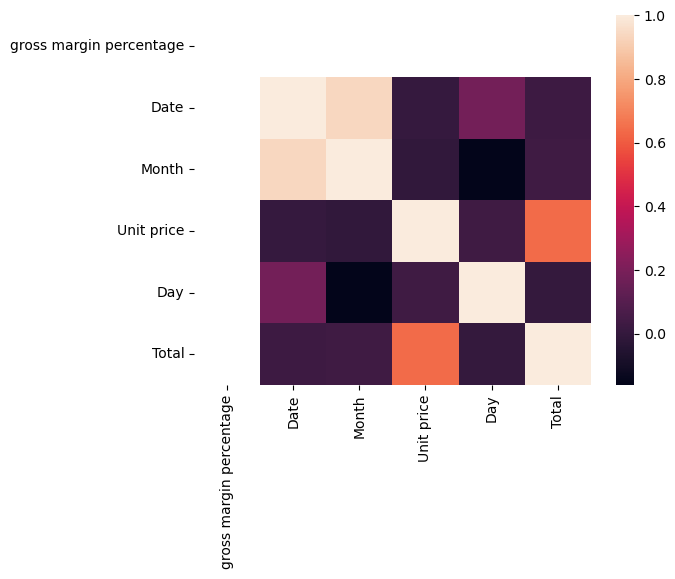

In [65]:
num_col=set(num_cols)-set(drop_featuers(Naypyitaw_City[num_cols])[1])
numeric_Cols=list(num_col)
sns.heatmap(Naypyitaw_City[numeric_Cols].corr(),annot=True)

In [66]:
Naypyitaw_City[numeric_Cols].corr()

,gross margin percentage,Date,Month,Unit price,Day,Total
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN
Date,NaN,1.000000,0.940249,0.003919,0.183556,0.028681
Month,NaN,0.940249,1.000000,-0.007473,-0.161010,0.030083
Unit price,NaN,0.003919,-0.007473,1.000000,0.029658,0.637761
Day,NaN,0.183556,-0.161010,0.029658,1.000000,-0.002050
Total,NaN,0.028681,0.030083,0.637761,-0.002050,1.000000


# Create a Model (Naypyitaw)

Text(0.5, 1.0, 'By using test size = 0')

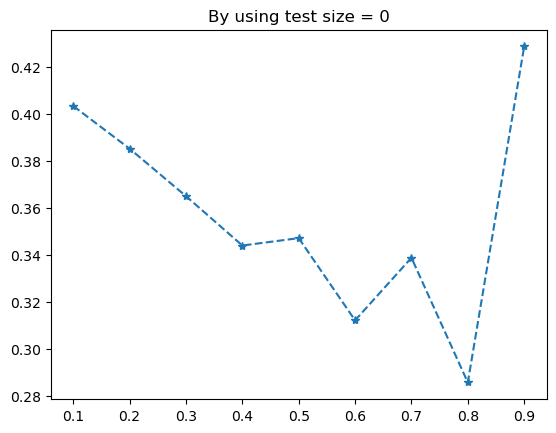

In [67]:
from sklearn.naive_bayes import GaussianNB
X=np.array(Mandalay_City['Unit price'])
X=X.reshape(-1,1)
y=np.array(Mandalay_City['Total'])
testing=np.linspace(0.1,0.9,9)

score=[]
for s in testing:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=s,random_state=0)
    Scaler=MinMaxScaler()
    Scaler.fit(X_train,y_train)
    Scaler.transform(X_train)
    Scaler.transform(X_test)
    Model=LinearRegression()
    Model.fit(X_train,y_train)
    r2=Model.score(X_train,y_train)
    score.append(r2)
plt.plot(testing,score,'*--')
plt.title('By using test size = 0')

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=s,random_state=0)
Scaler=MinMaxScaler()
Scaler.fit(X_train,y_train)
Scaler.transform(X_train)
Scaler.transform(X_test)
Model=LinearRegression()
Model.fit(X_train,y_train)
r2=Model.score(X_train,y_train)

In [69]:
# In naypyitaw is not very good 
r2

0.4288659085363147

In [70]:
df['Date']=pd.to_datetime(df['Date']);
df['Year']=df['Date'].dt.year
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month;
df.to_excel('Desktop/SUPERMARKET.xlsx')

# Creation the final model(all data)

In [84]:
num_cols=df.describe().columns

In [85]:
corr_matrix=df[num_cols].corr()

C:\Users\Empapy\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



<Axes: >

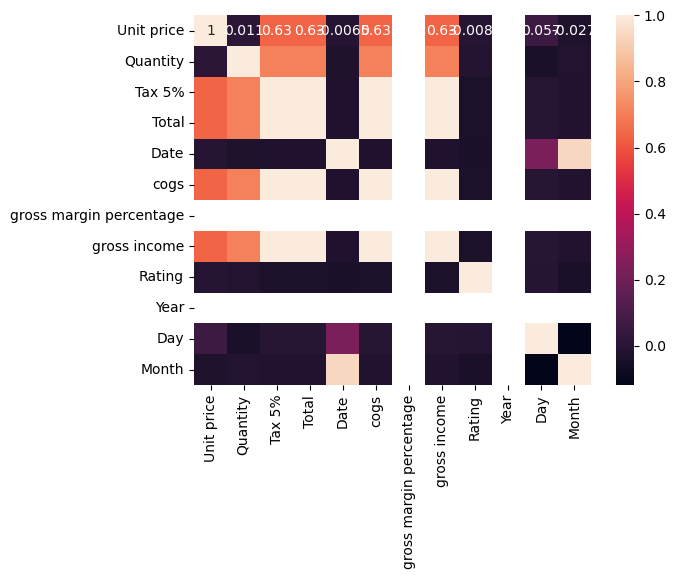

In [86]:
sns.heatmap(corr_matrix,annot=True)

In [87]:
def drop_over_corr(df, threshold=0.7):
    corr_mat = df.corr()
    features_to_drop = []
    for i in range(corr_mat.shape[0]-1):
        for j in range(i+1, corr_mat.shape[0]-1):
            if abs(corr_mat.iloc[i, j]) > threshold:
                if corr_mat.iloc[i, corr_mat.shape[0]-1] > corr_mat.iloc[j, corr_mat.shape[0]-1]:
                    features_to_drop.append(corr_mat.index[j])
                else:
                    features_to_drop.append(corr_mat.index[i])
    return df.drop(columns=features_to_drop), features_to_drop


In [88]:
new, cols = drop_over_corr(corr_matrix)


In [91]:
Last_cols=list(set(num_cols)-set(cols))

In [124]:
Last_cols=list(set(Last_cols)-set(['Year','Date','Rating','gross margin percentage','Day','Month']))

In [125]:
Last_cols

['Quantity', 'Unit price']

In [126]:
X=np.array(df[Last_cols])
y=np.array(df['cogs'])

# Data Preprocessing

Text(0.5, 1.0, 'By using test size = 0')

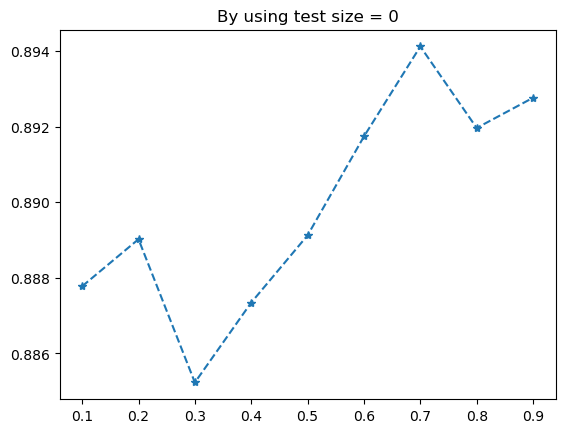

In [129]:
testing=np.linspace(0.1,0.9,9)

score=[]
for s in testing:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=s,random_state=0)
    Scaler=MinMaxScaler()
    Scaler.fit(X_train,y_train)
    Scaler.transform(X_train)
    Scaler.transform(X_test)
    Model=LinearRegression()
    Model.fit(X_train,y_train)
    r2=Model.score(X_train,y_train)
    score.append(r2)
plt.plot(testing,score,'*--')
plt.title('By using test size = 0')

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [131]:
Scaler=MinMaxScaler()
Scaler.fit(X_train,y_train)
X_train=Scaler.transform(X_train)
X_test=Scaler.transform(X_test)



In [105]:
Model = LinearRegression()
Model.fit(X_train,y_train)

LinearRegression()

In [106]:
Model.score(X_train,y_train)

0.889111399227544

In [120]:
y_pred=Model.predict(X_test)

In [121]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

In [122]:
mae

29353.35452116158

In [123]:
Model.score(X_test,y_test)

-18664.7544357685